#  Finding Corners

In [ ]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title = "", image = None, size = 10):
  h,w = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(aspect_ratio * size, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

# download & unzip images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

### Harris Corner Detector
OpenCV has the function cv2.cornerHarris() for this purpose. Its arguments are :
* img - Input image, it should be grayscale and float32 type.
* blockSize - It is the size of neighbourhood considered for corner detection
* ksize - Aperture parameter of Sobel derivative used.
* k - Harris detector free parameter in the equation.

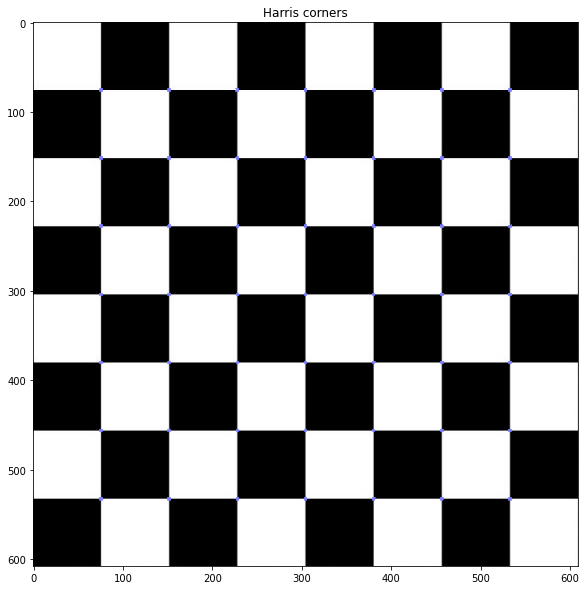

In [5]:
# laod image
image = cv2.imread("/content/images/chess.JPG")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

harris_corneres = cv2.cornerHarris(gray, 3, 3, 0.05)

# we use dialation of the corners to enlarge them
kernel = np.ones((7,7), np.uint8)
harris_corners = cv2.dilate(harris_corneres, kernel, iterations=2)

# Threshold for an optimal value, it may vary depending upon the image
image[harris_corneres > 0.25 * harris_corneres.max()] = [255, 127, 127]

imshow("Harris corners", image)

### cv2.goodFeatureToTrack(image, maxCorners, qualityLevel, minDistance)

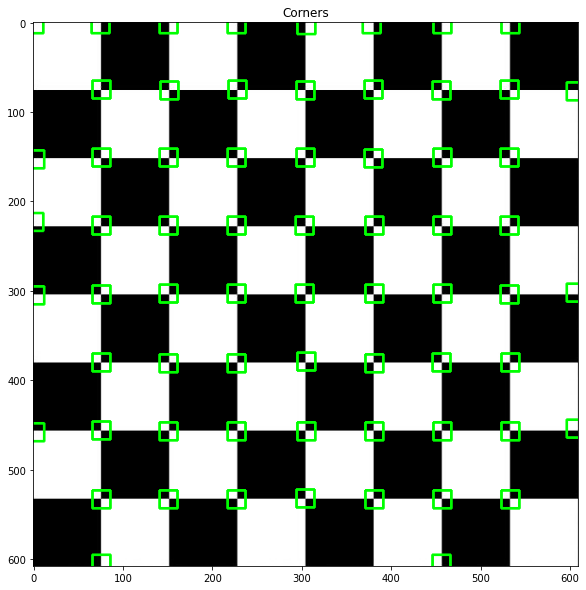

In [6]:
# laod image
image = cv2.imread("/content/images/chess.JPG")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# specify the top 50 corners
corners = cv2.goodFeaturesToTrack(gray, 150, 0.0005, 10)

for corner in corners:
  x,y = corner[0]
  x = int(x)
  y = int(y)
  cv2.rectangle(image, (x-10, y-10), (x+10, y+10), (0,255,0),2)

imshow("Corners", image)